#Cápsula 0 Introduccion a Pytorch

#### EL7014 Teoría de la Información: Fundamentos y Aplicaciones <br> Information and Decision Systems Group

## 0. Import

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import StandardScaler

from skimage import io

import numpy as np 

print(torch.__version__)

1.4.0


In [0]:
!nvidia-smi

Fri Mar 27 15:15:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 1. Tensores

Los tensores son la estructura de datos básica que soportan las librerias dedicadas al entrenamiento de Redes Neuronales. Funcionan como contenedores de parámetros, almacenan información sobre la naturaleza del parámetro y además son adjuntados automáticamente al gráfico de computación por default cuando es necesario.

In [0]:
a = torch.ones(3,4)

b = torch.zeros(2,3,4)

c_list = [[1,2],[3,4],[5,6]]
c = torch.Tensor(c_list)

print('a = {}'.format(a))
print(a.shape)
print(a.dtype)
print()

print('b = {}'.format(b))
print(b.shape)
print(b.dtype)
print()

print('c_list = {}'.format(c_list))
print()
print('c = {}'.format(c))
print(c.shape)
print(c.dtype)

a = tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.Size([3, 4])
torch.float32

b = tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
torch.Size([2, 3, 4])
torch.float32

c_list = [[1, 2], [3, 4], [5, 6]]

c = tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 2])
torch.float32


In [0]:
d = torch.FloatTensor([[1,2],[3,4]])
print('d = {}'.format(d))
print(d.shape)
print(d.dtype)
print()

d = tensor([[1., 2.],
        [3., 4.]])
torch.Size([2, 2])
torch.float32



In [0]:
e = torch.randn(2,4,3)

print('e = {}'.format(e))
print(e.shape)
print(e.dtype)
print()

e = tensor([[[ 1.0816, -0.3951,  0.9038],
         [-1.8096, -0.2438, -1.2986],
         [ 1.2146, -0.7262, -1.1166],
         [-1.3105, -1.7620, -1.4138]],

        [[-1.8602,  1.3214,  0.2413],
         [ 1.1196,  0.2057,  0.9485],
         [ 0.8398,  1.9521,  0.1376],
         [-1.2599,  0.6197,  1.9394]]])
torch.Size([2, 4, 3])
torch.float32



### Atributos de Tensores


Los tensores poseen 5 atributos que definen su comportamiento:
* data: Este atributo se utilizaba para visualizar los valores almacenados en el tensor. Este atributo esta deprecado por tanto no es recomendado utilizarlo para modificar o verificar el estado del tensor.

* dtype: Es el atributo el cual describe el tipo de dato que se almacena en el tensor. Por default los tensores se generan como float32, en algunos casos puede que sea necesario aumentar la precision del tipo de dato para distintos desempeños. Es imperativo que para operar 2 tensores estos posean el mismo tipo de dato.

* device: Es el atributo que indica en que lugar de procesamiento se encuentra el tensor. Por default los tensores se ubican primeramente en cpu, para mayor velocidad de calculo se recomienda utilizar gpu. Los tensores en cpu se almacenan en RAM mientras que los tensores en GPU utilizan la VRAM.

* shape: Este atributo indica las dimensiones del tensor.

* requires_grad: Este atributo le indica al grafo si se debe almacenar el gradiente de aquel tensor en particular. Es importante mencionar que requires_grad = False se utilice en tensores parametros solamente.


In [0]:
print(a.data)
print(a.dtype)
print(a.device)
print(a.shape)
print(a.requires_grad)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.float32
cpu
torch.Size([3, 4])
False


### Conversion de Tensor a numpy array o lista

Es habitual de que se desee almacenar informacion referente a ciertas secciones de la red neuronal para ciertas iteraciones o se deseen reportar valores de desempeño como la funcion de perdida, la cual tambien se modela como un tensor.
 Es por esto que es necesario tomar los datos y traspasarlos a un formato amigable y estatico, ya sea numpy array o python list.

In [0]:
a.numpy()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

Es importantisimo mencionar que para el caso del metodo .numpy(), que dispone pytorch para la clase Tensor, al momento de realizar la transformacion el arreglo resultante queda referenciado directamente al data storage del tensor original, y por tanto cualquier modificacion a este resultará en la modificacion del arreglo obtenido.

In [0]:
a[0][0] = 1
q = a.detach().numpy()

a[0][0] = 2
print(q)
print()
print(a.numpy())

[[2. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[2. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Para solucionar esto se introduce un metodo que permite crear un tensor identico pero aislado del gráfo el cual será referencia para el nuevo arreglo numpy

* detach: crea un tensor que comparte el data storage con el tensor original, solo que este nuevo tiene requires_grad = False.

* clone: crea una **copia** identica al tensor original y aisla esta instancia del gráfo.

In [0]:
a[0][0] = 1
q = a.clone().numpy()
a[0][0] = 2
print(q)
print()
print(a.numpy())

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[2. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Para el caso de python lists los metodos son mas directos e intuitivos, en donde en cada caso se crean copias a los valores del tensor sin necesariamente compartir data storage.
* .item() funciona para el caso particular de tensores unidimencionales con 1 solo valor y por tanto retorna un valor numerico.
* .tolist() transforma los datos a una python list.

In [0]:
a = torch.ones(1)
print(a)
q=a.item()

a[0]=2

print(a)
print(q)

tensor([1.])
tensor([2.])
1.0


In [0]:
a = torch.ones(2)
print(a)

q = a.tolist()

a[0] = 2

print(a)

print(q)

tensor([1., 1.])
tensor([2., 1.])
[1.0, 1.0]


### Broadcasting

***Extracto de la documentación de pytorch***

Two tensors are “broadcastable” if the following rules hold:

* Each tensor has at least one dimension.

* When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:

* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.

* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [0]:
a1 = torch.ones(5,1,4,1)
a2 = torch.ones(  3,1,1)

print((a1*a2).shape)
print((a1+a2).shape)

torch.Size([5, 3, 4, 1])
torch.Size([5, 3, 4, 1])


Does this two tensors broadcast?

In [0]:
b1 = torch.ones(3,1,2,5)
b2 = torch.ones(    1,3)

In [0]:
#b1 + b2

## 2. nn.Module Class

Bajo la lógica de efectuar constantemente operaciones a tensores bajo los mismos parámetros, se intruduce el concepto de Modulo.

Pytorch dispone de una estructura de clases para modulos cuyo padre corresponde a torch.nn.Module, el cual implementa las caracteristicas necesarias para que todos los modulos personalizados que hereden de dicha instancia cumplan una interfaz necesaria para operar tensores secuencialmente de manera fácil. Una vez ya definida la clase modulo custom, se puede tratar como **Caja Negra** a este operador y verlo solo como un corpus que recibe un tensor (o varios) y entrega un tensor (o varios).

A continuacion implementaremos la capa lineal de una red neuronal densa clásica.

>![MLP](https://res.cloudinary.com/practicaldev/image/fetch/s--4XiAvCCB--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/1200/1%2AYgJ6SYO7byjfCmt5uV0PmA.png)


$$ h(x) = xW+b $$

In [0]:
class module_example(nn.Module):
  def __init__(self,n_in,n_out):
        super(module_example, self).__init__()
        self.bias   = torch.nn.Parameter(torch.Tensor(torch.ones(n_out)), requires_grad=True)
        self.weigth = torch.nn.Parameter(torch.Tensor(torch.ones([n_in, n_out])), requires_grad=True)

  def forward(self, x):
    return torch.mm(x,self.weigth) + self.bias

Es importante notar que:
* En el constructor siempre se inicialice la clase padre
* Se defina la funcion forward y que esta entrege un tensor (o varios)

Para poder parametrizar las clases modulo es escencial añadir una subclase de Tensor llamada torch.nn.Parameter. Esta nueva estructura de datos se comporta identicamente a un Tensor, la única diferencia es que:
* Todas las intancias del tipo torch.nn.Parameter que se encuentran dentro del constructor de una clase modulo se almacenan en una lista de direcciones, de manera que más adelante se pueda acceder fácilmente a todos los parámetrosen la instancia del modulo.

En versiones anteriores para realizar calculos intermedios en un modulo se utilizaba la clase torch.nn.Variable, ahora esta clase está siendo deprecada y se recomienda utilizar Tensores comúnes para estos propositos.

In [0]:
c_list = [[1,2],[3,4],[5,6]]
c = torch.Tensor(c_list)

example = module_example(2,4)

print('weigth = {}\n'.format(example.weigth))
print('bias = {}\n'.format(example.bias))
print('---------------------------')
print('input = {}\n'.format(c))

out = example(c)

print('module_example(input) = {}'.format(out))

weigth = Parameter containing:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

bias = Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)

---------------------------
input = tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

module_example(input) = tensor([[ 4.,  4.,  4.,  4.],
        [ 8.,  8.,  8.,  8.],
        [12., 12., 12., 12.]], grad_fn=<AddBackward0>)


Por supuesto Pytorch ya tiene implementados los modulos más comúnes utilizados en DL, por lo que usted la mayoria de las veces no deberá implementar manualmente las capas de su red neuronal. A continuacion usted podrá observar que el modulo anterior example_module es identico a torch.nn.Linear.



In [0]:
a = nn.Linear(3,2)
print('Peso inicializado')
print(type(a.weight))
print(a.weight)

print('------------------------------------------------------------------------')

loaded_weight = [[1,1,1],[1,1,1]]
a.weight = torch.nn.Parameter(torch.Tensor(loaded_weight))
print('Luego de la modificacion de peso')
print(type(a.weight))
print(a.weight)

Peso inicializado
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[ 0.4790, -0.2769,  0.2287],
        [ 0.4785,  0.0155, -0.2985]], requires_grad=True)
------------------------------------------------------------------------
Luego de la modificacion de peso
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


Los pesos de estos modulos generalmente se inicializan de manera random (Estudiar tipos de inicializacion de capas neuronales), pero usted puede reemplazar estos por cualquiera que usted desee como se mostró en el ejemplo.

## 3. Dataset

Antes de continuar con la construccion de una red neuronal es importante mencionar que pytorch posee estructuras de datos que nos permiten manejar datasets de manera comoda para luego entrenar facilmente.

Para implementar un dataset custom de pytorch, es imperativo que se herede de la clase torch.utils.data.Dataset, ademas se definan los metodos \_\_len\_\_ y \_\_getitem\_\_. 

In [0]:
class standardDataset(Dataset):
  def __init__(self,X,y):
    if X.shape[0] != y.shape[0]:
      print('First dimesion of X and y must be the same')
      return
      
    self.X = X
    self.y = y
  
  def __len__(self):
    return self.X.shape[0]
  
  def __getitem__(self,idx):
    Xi = self.X[idx]
    yi = self.y[idx]
    return Xi,yi

Una vez creado el dataset, es necesario implementar una estructura de datos que permita manejar el dataset como batches y realizar otras modificaciones al mismo (shuffling por ejemplo). Naturalmente Pytorch ya tiene implementada esta estructura de datos y corresponde a la clase torch.utils.data.DataLoader que resulta ser una extension directa.

In [0]:
dataset = standardDataset(np.array([-2,-1,1,2]),np.array([0,0,1,1]))

#IMPORTANTE: el objeto dataset tiene que ser una clase hijo de torch.utils.data.Dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 2,shuffle = False)

La mayor facilidad de esta implementacion es que nos permite iterar directamente sobre los batch de la estructura sin necesidad de mayores arreglos,además nos entrega los batches como Tensores sin la necesidad de realizar parsing.

In [0]:
print('Comienzo de epoca')
print()
for n_batch,(X,y) in enumerate(dataloader):
  print('Batch N° {}'.format(n_batch+1))
  print('X = {}'.format(X))
  print('y = {}'.format(y))
  print()

print('Finalizacion de epoca')

Comienzo de epoca

Batch N° 1
X = tensor([-2])
y = tensor([0])

Batch N° 2
X = tensor([-1])
y = tensor([0])

Batch N° 3
X = tensor([1])
y = tensor([1])

Batch N° 4
X = tensor([2])
y = tensor([1])

Finalizacion de epoca


### Desgargando el dataset MNIST

Pytorch ya dispone de una gran cantidad de datasets clásicos utilizsados para el ML, el modulo torch.utils.data.datasets nos permite acceder a estos fácilmente (revisar la documentacion para mayor detalle).

Una mencion importante es mencionar que los datos descargados sean cargados como tensor por lo que la transformacion debe incluir dicha modificacion. 

Para el caso particular de este dataset ademas se agrega una normalizacion que es recomendada por distintasfuentes de internet que permite facilitar empiricamente el aprendizaje para el caso particular de MNIST

In [0]:
train_batch_size = 100
val_batch_size = 1000

train_dataset = datasets.MNIST(root='./', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

val_dataset = datasets.MNIST(root='./', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))


train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = train_batch_size)
val_loader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size = val_batch_size)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


### Random samples de MNIST

Realizamos una inspeccion visual de rutina para verificar que las etiquetas coincidan con los ejemplos

Label : 1


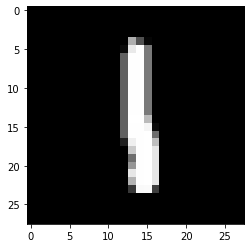


Label : 3


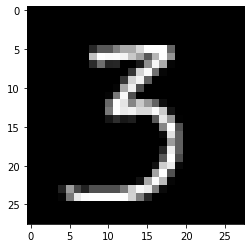

Label : 6


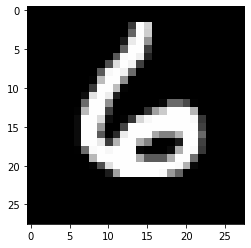

In [0]:
n_examples = 3
for n in range(n_examples): 
  index = np.random.randint(len(train_loader.dataset))
  img = train_loader.dataset[index][0].numpy()[0]
  print('Label : {}'.format(train_loader.dataset[index][1]))
  plt.figure()
  plt.imshow(img,cmap=cm.gray)
  plt.show()

Label : 2


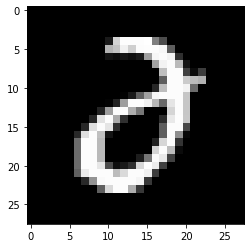

In [0]:
index = 21382
img = train_loader.dataset[index][0].numpy()[0]
print('Label : {}'.format(train_loader.dataset[index][1]))
plt.figure()
plt.imshow(img,cmap=cm.gray)
plt.show()

## 4. Construyendo la MLP


La red neuronal clasica MLP se modela como la concadenacion de funciones que toman como argumento la multiplicacion matricial más un sesgo de la etapa anterior. En otras palablas se puede escribir como: 

$\forall i \in [1,N] $

$y_i(x) = f_i(W_iy_{i-1}+b_i)$

 $y_0 =x$

Por tanto podemos definir que la respuesta de la red como la salida de la ultima capa de activacion.

$MLP(x) = y_N(x)$

Anterioremente se mostró que los modulos se componen de operaciones tensoriales que reciben un tensor de entrada y entregan uno (o varios) de salida, por tanto es directo notar que la red en particular se puede modelar como un modulo que contiene modulos de operaciones tensorales, es decir, basta con definir la estructura de la red y el método forward para crear nuestra propia arquitectura. Esto no es solo para las redes tipo MLP si no que para toda arquitectura de red neuronal.

### Harcoding way

Una de la forma más tradicional de crear clases para contener distintas arquitecturas es introducir los hiperparametros (ya sea dimensiones por capa como funciones no lineales) en la construccion de la red, de manera que si se desea cambiar estos valores se deba cambiar la definicion de la clase en si misma.

Las funciones de activacion se recomienda tratarlas como modulos, la razon de esto es que existen algunos casos donde las funciones no lineales dependen de un parametro en particular y dada la naturaleza de las redes neuronales este parametro tambien puede ser aprendible (ver CeLU). Aun así si usted desea puede el modulo torch.nn.functional para tratar las funciones de activacion como modificadores de tensores.

**TIP:** Existe una gran cantidad de modulos prefabricados en el modulo torch.nn, por tanto se recomienda que use aquellos en vez de crear modulos custom.

**TIP 2:** ¡nn.Sequential es uno de los modulos más utiles! permite concadenar modulos automaticamente, recibe una tupla de modulos y realiza la concadenacion usando el mismo ordenamiento que la tupla.

In [0]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
              nn.Linear(784, 100),
              nn.ReLU(),
              nn.Linear(100, 10))
        
    def forward(self, x):
        x = self.layers(x)
        return x

# O solo 

model = MLP()

model = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10))

[Parameter containing:
tensor([[ 0.0062,  0.0322,  0.0103,  ..., -0.0211, -0.0076,  0.0148],
        [-0.0228,  0.0156, -0.0248,  ...,  0.0263, -0.0143,  0.0331],
        [ 0.0272, -0.0214, -0.0129,  ..., -0.0130, -0.0251,  0.0176],
        ...,
        [ 0.0343,  0.0041,  0.0173,  ..., -0.0251, -0.0315,  0.0295],
        [-0.0344, -0.0142,  0.0279,  ...,  0.0086, -0.0313,  0.0308],
        [-0.0248,  0.0298, -0.0070,  ..., -0.0101, -0.0223, -0.0056]],
       requires_grad=True), Parameter containing:
tensor([-0.0138, -0.0211, -0.0328, -0.0325, -0.0266,  0.0337, -0.0214,  0.0118,
         0.0336,  0.0173,  0.0312,  0.0300, -0.0020,  0.0268, -0.0265, -0.0256,
         0.0214, -0.0275, -0.0232, -0.0033, -0.0019,  0.0123, -0.0181, -0.0332,
         0.0091,  0.0286, -0.0232, -0.0167, -0.0108,  0.0217,  0.0100,  0.0323,
         0.0153, -0.0329, -0.0054,  0.0016, -0.0003,  0.0009,  0.0275,  0.0055,
        -0.0317, -0.0186, -0.0309,  0.0068,  0.0195,  0.0261, -0.0068, -0.0044,
        -0.00

### Uso de Sequential (adaptative class)

Una estructura de red neuronal mejor implementada permite en cada instancia modificar la cantidad de capas, las dimensiones de las capas y las funciones de activacion de manera más simple.

En este ejemplo se crea un unico modulo (nn.Sequential) al cual se le agregaran (dado que nn.Sequential cuenta con el metodo add_module) tantas capas lineales y funciones de activacion como se indica en el constructor.

In [0]:
class MLP(nn.Module):
    def __init__(self,neural_layers,act_fun):
        super(MLP, self).__init__()
        self.layers = nn.Sequential()
        
        if len(neural_layers) < 2:
          print('len(neural_layes) must be higher than 2')
          return
        for i in range(len(neural_layers)-1):
          self.layers.add_module('layer_{}'.format(i+1),
                                 nn.Linear(neural_layers[i],
                                           neural_layers[i+1])
                                 )
          self.layers.add_module('act_fun_{}'.format(i+1),
                                 act_fun[i])
        
    def forward(self, x):
        x = self.layers(x)
        return x

### Usando ModuleList (adaptative class)

**IMPORTANTE**

Dada la implementacion que tiene pytorch para que los modulos reporten sus parametros a su modulo "padre", es estrictamente necesario de que todos los modulos aparezcan en los atributos del modulo padre, es decir, si se desea tener un arreglo de modulos como una lista de python para luego indexarlos facilmente para su uso en el metodo forward, los párametros de dichos modulos **NO se reportarán en el modulo padre y por consiguiente se perdera sus referencias haciendo imposible el entrenamiento y actualizacion de dichos parámetros**, para solucionar este problema Pytorch tiene implementado un modulo nn.ModuleList que funciona como un tipo de lista que permite mantener registro de los parametros sobre los modulos adheridos a su estructura. 

In [0]:
class MLP(nn.Module):
    def __init__(self,neural_layers,act_fun):
        super(MLP, self).__init__()

        if len(neural_layers) < 2 or len(act_fun) < 1 or len(neural_layers) - len(act_fun) != 1:
          print('len(neural_layes) must be larger than 2, len(act_fun) be larger\
           than 1 and len(neural_layes) - len(act_fun)  = 1')
          return
        
        layers_list  = []
        
        for i in range(len(neural_layers)-1):
          layers_list.append(nn.Linear(neural_layers[i],
                                       neural_layers[i+1]))
          
        self.layers = nn.ModuleList(layers_list) # <- Importante
        self.activation_fun = nn.ModuleList(act_fun)
        
    def forward(self, x):
        for index in range(len(self.layers)):
          x = self.layers[index](x)
          x = self.activation_fun[index](x)
        return x

### Jugando con el metodo forward

Las ventajas de usar el modulo nn.ModuleList sobre nn.Sequential es el caso en donde la arquitectura de la red no es estrictamente lineal, uno de los ejemplos mas clásicos es la red ResNet para clasificar imagenes, en donde cada cierta cantidad de pasos una capa se define como la suma de sus 2 anteriores. 

>![resnet](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/ResNets.svg/330px-ResNets.svg.png)

A continuacion se propone un modelo custom al que llamaremos Res-MLP

In [0]:
class res_MLP(nn.Module):
    def __init__(self,neural_layers,act_fun):
        super(res_MLP, self).__init__()

        if len(neural_layers) < 2 or len(act_fun) < 1 or len(neural_layers) - len(act_fun) != 1:
          print('len(neural_layes) must be larger than 2, len(act_fun) be larger\
           than 1 and len(neural_layes) - len(act_fun)  = 1')
          return
        
        layers_list  = []
        
        for i in range(len(neural_layers)-1):
          layers_list.append(nn.Linear(neural_layers[i],
                                       neural_layers[i+1]))
          
        self.layers = nn.ModuleList(layers_list)
        self.activation_fun = nn.ModuleList(act_fun)
        
    def forward(self, x):

        for index in range(len(self.layers)):
          x = self.layers[index](x)
          x = self.activation_fun[index](x)
          #Cada 2 capas la capa i-esima se escribe como capa(i-1) + capa(i-2) 
          if index % 2 == 0 and index !=0:
            #Recuerda el valor
            res = x

            if index > 0 and index % 2 == 0:
              #aplica la suma
              x = x + res

        return x

## 5. Entrenamiento

### Backpropagation en Pytorch

Dado que ya hemos implementado la estructura principal de una red neuronal tipo MLP, es hora de estudiar los aspectos tecnicos del entrenamiento de una red neuronal. 

Como es sabido la popularidad de las redes neuronales creció en el último tiempo debido al aumento del poder computacional de los computadores. La tecnica que se utiliza para entrenar las redes neuronales se llama **backpropagation** y se basa en minimizar (o maximizar) una funcion de perdida (o ganancia) por medio del cálculo de los gradientes con respecto a los parametros de la red, a partir de estos gradientes se utilizan distintos metodos de actualizacion para explorar la superficie descrita por la función de perdida con respecto a los parámetros.

Es por esto que es imperativo calcular las derivadas parciales de la funcion de perdida con respecto a cada uno de los párametros de la red de manera teórica por medio de aplicar la regla de la cadena varias veces y de esta forma propagar el gradiente desde el final de la red hasta las capas iniciales de la misma (de allí el nombre backpropagation). Normalmente en un curso dedicado al aprendizaje de máquinas este tema sería abordado con gran detalle y se le pediría a usted que calcule teóricamente estos gradientes para alguna red vanilla como lo es la MLP, por otro lado, dado que este es un curso dedicado a como conceptos de teoría de la información son aplicados al aprendizaje no profundizaremos en este aspecto, para ello existe otros cursos que se dedican a ahondar en este tema.

Afortumandamente Pytorch nos entrega un framework que nos permite obviar en ciertamanera este aspecto debido a que mediante el modulo **torch.autograd** es posible **propagar el gradiente sin la necesidad de deducir las derivadas en cada caso** dado a que la librería aproxima estos valores mediante metodos numéricos.


### Optimizadores en Pytorch

Los optimizadores corresponden a las reglas de actualizacion con la cual la red explorara inteligentemente la superficie descrita por la funcion de perdida con respecto a los parámetros, el objetivo es encontrar un mínimo (o máximo) que permita a la red generalizar de buena manera el comportamiento deseado.

Pytorch tiene implementado una gran gamma de optimizadores, lo importante es que estos estan desarrollados de manera que las redes creadas como clases hijas del modulo nn.Module tengan sinergía y el entrenamiento resulte trivial. Todas las instancias de optimizadores se encuentran en torch.optim y necesitan como argumento la lista de parametros del modelo asi como otros hiperparametros que dependen del tipo de optimizador. Recordemos que si usted implemento de buena manera los modulos de su red (revisar sección de construcción de MLP), entonces usted podra acceder al listado de parametros de su red mediante el metodo .parameters()

**Importante:** Los optimizadores siempre minimizarán la función de pérdida, por tanto si desea maximizar la función de pérdida entonces deberá cambiar su signo.

### Funciones de perdida

La definicion de funcion de perdida es escencial para el entrenamiento de una red neuronal puesto que explicita cual es el comportamiento deseado para la red. Bajo el concepto de esta cápsula estudiaremos el caso de clasificación.

En clasificacion la funcion objetivo más utilizada la **Entropía Cruzada** y para propositos de computo se puede escribir como:

$L(x,\hat{y}) = -\frac{1}{N} \sum^n_{i=1}\log (T_{\omega}(x_i)[\hat{y_i}])$

en donde: 
* $x$ es el batch de entrada con dimensiones $(B,F_{in})$
* $\hat{y}$ es la clase predicha representado como un vector de dimension $B$ en donde las clases se representan como valores enteros entre $[0,C-1]$  (Una representacion alternativa es escribir la clases en codificación *one hot* resultando en una matriz de dimensiones $(B,C)$)
* $T_w$ es la que cumple $T_w: \mathcal{R}^{F_{in}} \rightarrow [0,1]^C$, por tanto la red entregará una valor de 0 a 1 para cada clase.
* $T_{\omega}(x_i)[\hat{y_i}]$ significa que para el i-ésimo valor del batch la función de perdida considera solo la respuesta correspondiente a la clase correcta (i.e. se indexa el vector respuesta $T_w(x)$ con el indice $\hat{y}$)

La idea intuitiva de esta funcion objetivo es que se intenta **maximizar la respuesta correspondiente a la clase correcta**, de esta manera la decision que tome la red será la salida 

Es importante notar que el espacio de llegada de la red es cerrado, es decir, en el peor de los casos se puede saturar en 1 para todos los casos y así se tendria un desempeño "perfecto" desde el punto de vista de la funcion objetivo. Para apalear este comportamiento y tambíen para dar una interpretacion probabilistica de la respuesta de la red usualmente se utilizan funciones de salida que sean normalizadas a 1, y por consiguiente puedan se interpretadas como distribuciones de probabilidad. 

La función de salida más común es:

$softmax(x) = \frac{e^{x_i}}{\sum e^{x_i}}$

donde que esta definida en $\mathcal{R^C}\rightarrow [0,1]^C$. De esta forma la respuesta de la red se puede interpretar como una distribucion de probabilidad de la clase con respecto a los datos de entrada $T_w \sim p(y|x)$. 

### Definicion completa de entremiento

Para entrenar una red es nesario determinar 3 aspectos.
* El modelo
* El optimizador
* La función de pérdida o criterio.

In [0]:
model = MLP([784,100,10],[nn.ReLU(),nn.LogSoftmax(dim = 1)])

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

criterion = nn.NLLLoss()

NameError: ignored

### Loop de Entrenamiento

Las redes neuronales se entrenan al recorrer varias veces el dataset completo de entrenamiento mediante pequeños batches, las veces que recorre el dataset le llamaremos epocas.

Ahora por cada epoca y por cada batch se realizaran los siguientes pasos:

* Se toma la entrada denotada como X y la clase a la que pertenece denotada como y.
* Se ajusta la entrada para que tome la forma que la red espera (en este caso un tensor de dimension (n_batch,Features)).
* Se le dice al optimizador que olvide los gradientes anteriores (**Muy Importante** puesto que de no hacerlo los gradientes nuevos se sumaran a los anteriores).
* Se le pide a la red que entrege su respuesta entregandole el batch de datos X.

* Se evalua dicha respuesta en el criterio.

* Se le dice al criterio (que es el último tensor en el flujo del gráfo dinámico) que propage el gradiente hacia atrás con el método .backward()

* Se le pide al optimizador que actualice según su técnica a todos los párametros que se le fueron entregados al momento de ser creado dado los gradientes que fueron calculados en el paso anterior.

* Repetir hasta que el criterio de detenimiento ocurra.

In [0]:
epochs = 5

model.train()
for epoch in range(epochs):
  
  for i,(x_b,y_b) in enumerate(train_loader):

    X_b = x_b.view(x_b.size(0), -1)# Transform image to a vector

    optimizer.zero_grad()
    
    y_pred = model.forward(X_b)
    
    loss = criterion(y_pred,y_b)
    
    loss.backward()

    optimizer.step()

  print('Epoch : {} || Loss : {:.3f}'.format(epoch+1,loss.item()))

Epoch : 1 || Loss : 0.409
Epoch : 2 || Loss : 0.338
Epoch : 3 || Loss : 0.307
Epoch : 4 || Loss : 0.286
Epoch : 5 || Loss : 0.269


### Loop de entrenamiento (GPU)

Es de conocimiento general que el hardware conocido como GPU esta creado con la intencion de calcular con mayor velocidad operaciones matematicas, es por esto que las librerias de entrenamiento de redes neuronales se adaptan a estos hardware para correr sus procesos allí y así disminuir los tiempos de entrenamiento.

Primeramente entrenar en GPU suena como una tarea extremadamente dificil, pero gracias a pytorch la implementacion de esta resulta extremadamente trivial, puesto que basta con solicitar a la red que envíe sus parametros a GPU con el método .cuda() incorporado en toda clase que era de nn.Module. De la misma manera todo tensor que entre a la red tambien deberá estar ubicado en GPU puesto que de otra manera se entra en conflicto.

A continuacion se presenta el loop de entrenamiento para GPU el cual es identico al caso anterior solo que con 3 pequeñas modificaciones señaladas en el código.

In [0]:
model = MLP([784,100,10],[nn.ReLU(),nn.LogSoftmax(dim = 1)])

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

criterion = nn.NLLLoss()

In [0]:
epochs = 5

model = model.cuda() # <--------------------------
model.train()
for epoch in range(epochs):
  
  for i,(x_b,y_b) in enumerate(train_loader):

    x_b = x_b.cuda()# <-------------------------
    y_b = y_b.cuda()# <-------------------------

    X_b = x_b.view(x_b.size(0), -1)# Transform image to a vector

    optimizer.zero_grad()
    
    y_pred = model.forward(X_b)
    
    loss = criterion(y_pred,y_b)
    
    loss.backward()

    optimizer.step()

  print('Epoch : {} || Loss : {:.3f}'.format(epoch+1,loss.item()))

Epoch : 1 || Loss : 0.406
Epoch : 2 || Loss : 0.338
Epoch : 3 || Loss : 0.307
Epoch : 4 || Loss : 0.284
Epoch : 5 || Loss : 0.267


### Training and evaluation loop + Loss and accuracy report

Finalente para tener el loop de entrenamiento completo es importante estudiar como avanza la funcion de perdida y el accuracy tanto en entrenamiento como en validacion.

A continuacion se muestra un loop de entrenamiento standard que permite estudiar y reportar estos criterios.

In [0]:
def correct_labels(y_pred,target):
  pred = np.argmax(y_pred, axis=1)
  return np.sum(np.equal(pred,target))

In [0]:
model = res_MLP([784,50,50,50,50,10],[nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.LogSoftmax(dim = 1)])

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

criterion = nn.NLLLoss()

In [0]:
epochs = 10

train_loss = []
val_loss = []

train_acc = []
val_acc = []

model = model.cuda()
model.train()
for epoch in range(epochs):
  
  temp_train_loss = 0.0
  corrects_train = 0
  for i,(x_b,y_b) in enumerate(train_loader):

    x_b = x_b.cuda()
    y_b = y_b.cuda()

    X_b = x_b.view(x_b.size(0), -1)# Transform image to a vector

    optimizer.zero_grad()
    
    y_pred = model.forward(X_b)
    
    loss = criterion(y_pred,y_b)
    
    loss.backward()
    optimizer.step()

    corrects_train += correct_labels(y_pred.clone().detach().cpu().numpy(),
                                  y_b.clone().detach().cpu().numpy())
    
    temp_train_loss += loss.item()/len(train_loader)

  temp_val_loss = 0.0
  corrects_val = 0
  for i,(x_b,y_b) in enumerate(val_loader):

    x_b = x_b.cuda()
    y_b = y_b.cuda()

    X_b = x_b.view(x_b.size(0), -1)
    
    y_pred = model.forward(X_b.float())
    
    loss = criterion(y_pred,y_b)

    corrects_val += correct_labels(y_pred.clone().detach().cpu().numpy(),
                                  y_b.clone().detach().cpu().numpy())
    
    temp_val_loss += loss.item()/len(val_loader)
  
  train_loss.append(temp_train_loss)
  val_loss.append(temp_val_loss)

  train_acc.append(corrects_train/len(train_loader.dataset))
  val_acc.append(corrects_val/len(val_loader.dataset))
  print('Epoch {:3d} ||Train Loss : {:5.3f}||Val Loss : {:5.3f}'.format(epoch+1,temp_train_loss,temp_val_loss))

Epoch   1 ||Train Loss : 2.119||Val Loss : 0.793
Epoch   2 ||Train Loss : 0.633||Val Loss : 0.572
Epoch   3 ||Train Loss : 0.458||Val Loss : 0.452
Epoch   4 ||Train Loss : 0.359||Val Loss : 0.388
Epoch   5 ||Train Loss : 0.294||Val Loss : 0.341
Epoch   6 ||Train Loss : 0.250||Val Loss : 0.304
Epoch   7 ||Train Loss : 0.220||Val Loss : 0.275
Epoch   8 ||Train Loss : 0.197||Val Loss : 0.257
Epoch   9 ||Train Loss : 0.177||Val Loss : 0.244
Epoch  10 ||Train Loss : 0.161||Val Loss : 0.230


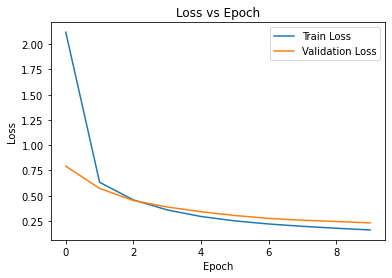

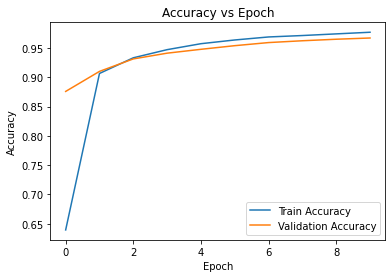

In [0]:
plt.figure()

plt.plot(train_loss, label = 'Train Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure()

plt.plot(train_acc, label = 'Train Accuracy')
plt.plot(val_acc, label = 'Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Inspecion visual del modelo

A continuacion realizamos una inspeccion visual del desempeño en clasificacion de la red

True label      : 1
Predicted label : 1


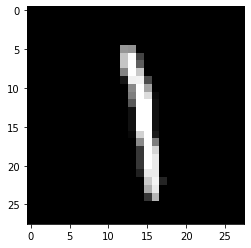

True label      : 0
Predicted label : 0


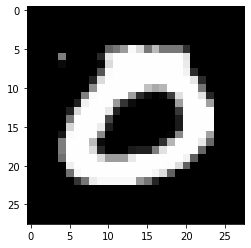

True label      : 0
Predicted label : 0


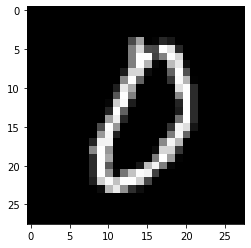

In [0]:
model = model.cpu()
model.eval()

examples = 3

for ii in range(examples):

  index = np.random.randint(len(val_loader.dataset))

  X_sample, y_sample = val_loader.dataset[index]

  X = X_sample.view(X_sample.size(0), -1)
  y_pred = F.log_softmax(model(X), dim = 1)
  y_pred = model(X)


  img = val_loader.dataset[index][0].numpy()[0]

  print('True label      : {}'.format(y_sample))
  print('Predicted label : {}'.format(np.argmax(y_pred.clone().detach().numpy())))

  plt.figure()
  plt.imshow(img,cmap=cm.gray)
  plt.show()

  

## 6. Guardando el Modelo

Dado que el entrenamiento es general costo computacionalmente y en algunos casos inestable (para redes muy complejas) es crucial poder almacenar los parámetros que obtuvimos en entrenamiento. 

Como es de esperar Pytorch nos entrega un framework que nos permite almacenar en un archivo los parametros de la red para luego poder cargarlos a un modelo cuando nostoros lo dispongamos.

In [0]:
save_PATH = './mnist_MLP.pth'
torch.save(model.state_dict(), save_PATH)
!ls

MNIST  mnist_MLP.pth  sample_data


In [0]:
del model

Para cargar los datos es necesario crear una instancia de la arquitectura de la red y a esta cargar lo

In [0]:
#Crear instancia con pesos random
model = res_MLP([784,50,50,50,50,10],[nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.LogSoftmax(dim = 1)])
#Cargar parametros desde el archivo a la red
model.load_state_dict(torch.load(save_PATH))
#Settear el modelo en evaluacion (los parámetros estan congelados)
model.eval()

res_MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=10, bias=True)
  )
  (activation_fun): ModuleList(
    (0): ReLU()
    (1): ReLU()
    (2): ReLU()
    (3): ReLU()
    (4): LogSoftmax()
  )
)

Podemos realizar una inspeccion visual para verificar que el archivo almaceno correctamente nuestra red entrenada para clasificar MNIST

True label      : 9
Predicted label : 9


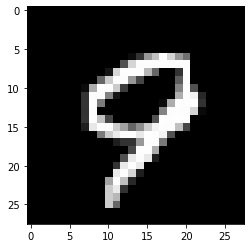

True label      : 9
Predicted label : 9


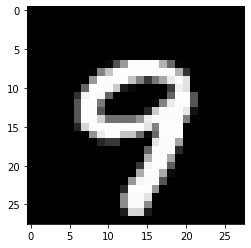

True label      : 1
Predicted label : 1


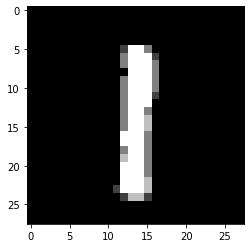

In [0]:
model = model.cpu()
model.eval()

examples = 3

for ii in range(examples):

  index = np.random.randint(len(val_loader.dataset))

  X_sample, y_sample = val_loader.dataset[index]

  X = X_sample.view(X_sample.size(0), -1)
  y_pred = model(X)


  img = val_loader.dataset[index][0].numpy()[0]

  print('True label      : {}'.format(y_sample))
  print('Predicted label : {}'.format(np.argmax(y_pred.clone().detach().numpy())))

  plt.figure()
  plt.imshow(img,cmap=cm.gray)
  plt.show()

### Saving Checkpoint

Es extremadamente habitual que debido a la inestabilidad del entrenamiento o el inminente colapso de nuestro hardware nosotros deseemos guardar Checkpoints del entrenamiento, es decir, recordar el estado de la red, el estado de los gradientes, el estado del optimizador y la epoca de entrenamiento.

Pytorch nuevamente nos permite almacenar toda esta estructura de datos mas compleja de una manera simple.

In [0]:
checkpoint_PATH = './checkpoint_1'
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            }, checkpoint_PATH)

Luego de forma similar al caso anterior, creamos instancias random tanto de la red como el optimizador para luego cargar la informacion del checkpoint a dichas instancias.

In [0]:
model = res_MLP([784,50,50,50,50,10],[nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.ReLU(),nn.LogSoftmax(dim = 1)])
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

checkpoint = torch.load(checkpoint_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']

model.eval()

res_MLP(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=10, bias=True)
  )
  (activation_fun): ModuleList(
    (0): ReLU()
    (1): ReLU()
    (2): ReLU()
    (3): ReLU()
    (4): LogSoftmax()
  )
)

Los ejemplos mostrados anteriormente corresponden a casos particulares de la gran gamma de opciones de guardado que nos permite python, en particular son para casos en donde los parametros de la red se encuentran en CPU. 

Para estudiar con mayor detalle otras formas de almacenar parámetros se recomienda estudiar el siguiente link https://pytorch.org/tutorials/beginner/saving_loading_models.html